In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

<font color = 'lime'>Abrimos nuestro csv de vinos.

In [3]:
vinos = pd.read_csv('vinos.csv', index_col= 0).reset_index()
vinos.sample(10)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
6064,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90,NaN,NaN,NaN
6219,Contino,Rioja Graciano,2011,4.2,395,Espana,Rioja,61.94,Rioja Red,4.0,3.0
4389,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90,NaN,NaN,NaN
1870,Alto Moncayo,Veraton Garnacha,2014,4.2,1627,Espana,Campo de Borja,19.94,Grenache,5.0,3.0
2524,Vinedos de Paganos,El Puntido,2005,4.2,384,Espana,Rioja,73.00,Rioja Red,4.0,3.0
1315,Pazo de Rubianes,Albarino,2020,4.3,281,Espana,Rias Baixas,13.75,Albarino,NaN,NaN
3863,Portal del Priorat,Clos del Portal Somni,2014,4.2,404,Espana,Priorato,77.36,Priorat Red,4.0,3.0
4993,Contino,Rioja Graciano,2011,4.2,395,Espana,Rioja,61.94,Rioja Red,4.0,3.0
232,Vega Sicilia,Unico,1967,4.6,123,Espana,Ribera del Duero,1106.24,Ribera Del Duero Red,5.0,3.0
6667,Matsu,El Viejo,2019,4.2,400,Espana,Toro,27.89,Toro Red,5.0,3.0


In [4]:
x=vinos['num_reviews'].values.reshape(-1, 1)
y= vinos['price'].values.reshape(-1, 1)

#### 1. Realizar de nuevo el ajuste lineal con los mismos datos y parámetros utilizados en la lección anterior.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) 

In [6]:
LR = LinearRegression(n_jobs=-1)
LR.fit(x_train, y_train)
y_predict_train = LR.predict(x_train)
y_prediction = LR.predict(x_test)

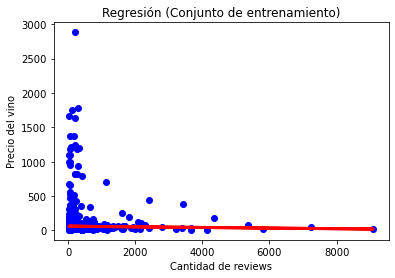

In [7]:
plt.scatter(x_test,y_test,color="blue")  
plt.plot(x_test,y_prediction,color="red",linewidth=3) 
plt.title('Regresión (Conjunto de entrenamiento)')
plt.xlabel('Cantidad de reviews')
plt.ylabel('Precio del vino')
plt.show()

#### 2.Realizar un estudio de las asunciones de linealidad para los resultados obtenidos de nuestra regresión lineal simple.

<font color = 'lime'> - LINEALIDAD

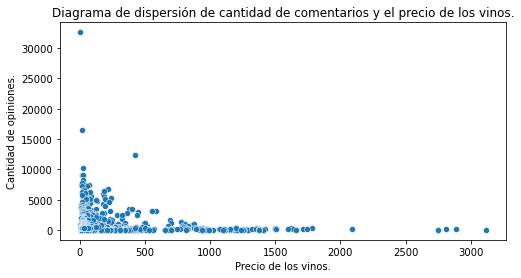

In [8]:
plt.figure(figsize =(8,4)) 
fig = sns.scatterplot(x='price' , y='num_reviews', data = vinos, ci= None) 
fig.set(xlabel='Precio de los vinos.', ylabel = 'Cantidad de opiniones.') 
fig.set_title('Diagrama de dispersión de cantidad de comentarios y el precio de los vinos.') 
plt.show();

<font color = 'lime'>Vemos que nuestros datos no siguen una linealidad.

<font color = 'lime'> - INDEPENDENCIA

In [9]:
residuals = (y_test - y_prediction)

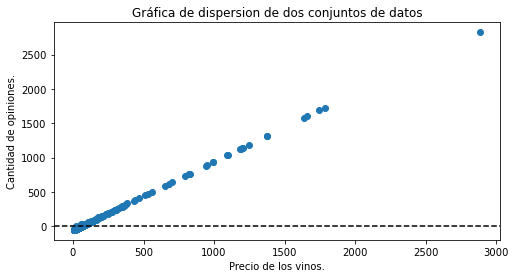

In [10]:
fig,ax = plt.subplots(figsize= (8,4)) 
plt.scatter(x=y_test , y=residuals) 
plt.axline((float(min(y_prediction)),0),(float(max(y_prediction)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos') 
ax.set_xlabel('Precio de los vinos.') 
ax.set_ylabel('Cantidad de opiniones.') 
plt.show();

<font color = 'lime'>Nuestros datos no son independientes porque vemos que nuestros residuos no estan entorno a y=0.

<font color = 'lime'> - HOMOCEDASTICIDAD

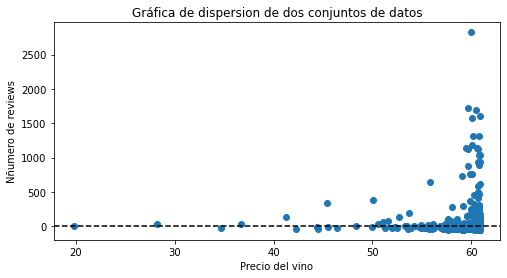

In [11]:
fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_prediction , y=residuals)
plt.axline((float(min(y_prediction)),0),(float(max(y_prediction)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Precio del vino')
ax.set_ylabel('Nñumero de reviews')
plt.show()

<font color = 'lime'> De nuevo vemos que los valores predichos no están distibuídos uniformemente. Así que no se cumple la condición de homocedasticidad.

/home/lcp87/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


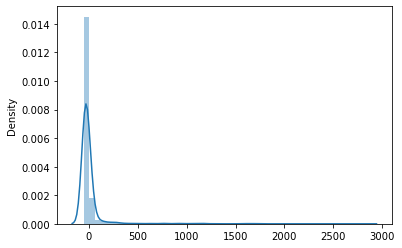

In [28]:
fig = plt.figure()
sns.distplot(residuals)
plt.show();

/home/lcp87/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


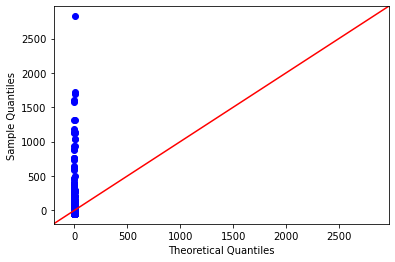

In [29]:
sm.qqplot(residuals, line = '45')
py.show();

<font color = 'lime'> Con estos dos gráficos observamos claramente que nuestros datos no son normales. No tienen formato de campana de Gauss (arriba) y los datos no siguen la línea roja del Q-Qplot que es lo que nos indica que son normales.

### 3. Interpretación de los resultados. Ahora interpreta los resultados obtenidos del estudio de las asunciones de linealidad del ajuste lineal simple y explica lo mejor posible los resultados obtenidos, así como si se cumple o se incumple algunas de las asunciones de linealidad.

<font color = 'lime'> Nuestros datos no están distribuídos de forma normal alrededor de la línea central, por lo que nuestros datos no cumplen la condición de normalidad. En el displot vemos que nuestros datos se concentran entorno al valor cero, pero no se asemejan a la forma de campana de Gauss. Por lo tanto, confirmamos una vez más que no cumplen la condición de normalidad.

<font color = 'lime'> Vamos a probar las asunciones de linealidad para las variables `rating` y `price`.

In [13]:
x1=vinos['rating'].values.reshape(-1, 1)
y1= vinos['price'].values.reshape(-1, 1)

In [14]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42) 

In [15]:

LR1 = LinearRegression(n_jobs=-1)
LR1.fit(x1_train, y1_train)
y1_predict_train = LR1.predict(x1_train)
y1_prediction = LR1.predict(x1_test)

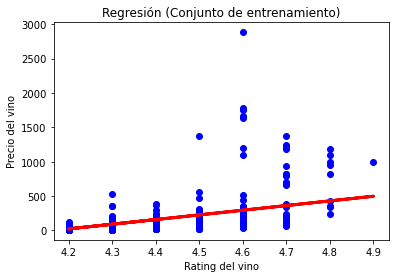

In [16]:
plt.scatter(x1_test,y1_test,color="blue")  
plt.plot(x1_test,y1_prediction,color="red",linewidth=3) 
plt.title('Regresión (Conjunto de entrenamiento)')
plt.xlabel('Rating del vino')
plt.ylabel('Precio del vino')
plt.show()

In [17]:
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y1_train,y1_predict_train))
print('El MAE es',mean_absolute_error(y1_train,y1_predict_train))
print('El MSE es',mean_squared_error(y1_train,y1_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y1_train,y1_predict_train)))


print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y1_test,y1_prediction))
print('El MAE es',mean_absolute_error(y1_test,y1_prediction))
print('El MSE es',mean_squared_error(y1_test,y1_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y1_test,y1_prediction)))

Para el conjunto train:---------------
El valor de r2 score es  0.29555589075007604
El MAE es 43.02393190850067
El MSE es 14913.117323843206
EL RMSE es  122.11927498901721
Para el conjunto test:---------------
El valor de r2 score es  0.2992320838778231
El MAE es 48.45073267240612
El MSE es 19840.003087143097
EL RMSE es  140.85454585189325


<font color = 'lime'> - LINEALIDAD

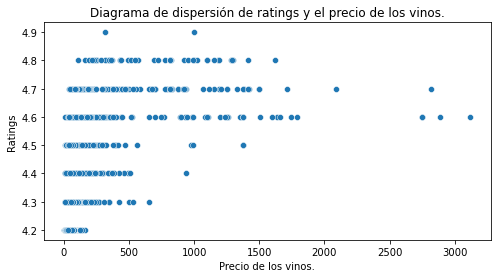

In [22]:
plt.figure(figsize =(8,4)) 
fig = sns.scatterplot(x='price' , y='rating', data = vinos, ci= None) 
fig.set(xlabel='Precio de los vinos.', ylabel = 'Ratings') 
fig.set_title('Diagrama de dispersión de ratings y el precio de los vinos.') 
plt.show();

<font color = 'lime'> - INDEPENDENCIA

In [23]:
residuals1 = (y1_test - y1_prediction)

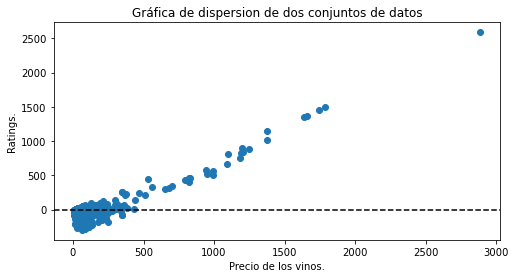

In [25]:
fig,ax = plt.subplots(figsize= (8,4)) 
plt.scatter(x=y1_test , y=residuals1) 
plt.axline((float(min(y1_prediction)),0),(float(max(y1_prediction)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos') 
ax.set_xlabel('Precio de los vinos.') 
ax.set_ylabel('Ratings.') 
plt.show();

<font color = 'lime'> Como volvemos a ver nuestros datos no están en torno al y = 0 por lo que podemos decir que no son independientes

<font color = 'lime'> - HOMOCEDASTICIDAD

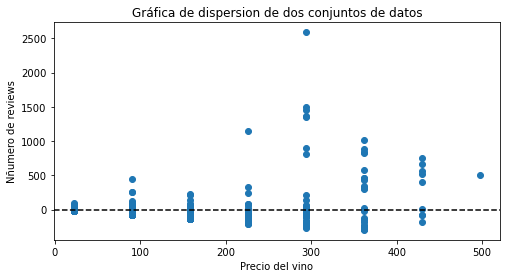

In [26]:
fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y1_prediction , y=residuals1)
plt.axline((float(min(y1_prediction)),0),(float(max(y1_prediction)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Precio del vino')
ax.set_ylabel('Nñumero de reviews')
plt.show()

<font color = 'lime'>Observamos que nuestros datos no se distribuyen de manera homogénea por lo confirmamos que no son homocedásticos.

/home/lcp87/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


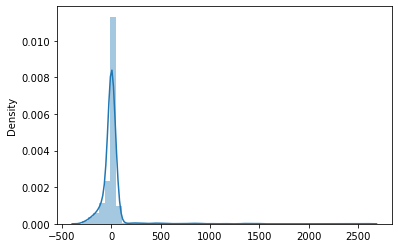

In [30]:
fig = plt.figure()
sns.distplot(residuals1)
plt.show()


/home/lcp87/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


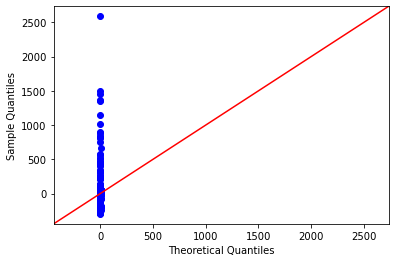

In [31]:
sm.qqplot(residuals1, line = '45')
py.show();

<font color = 'lime'> Observamos que nuestro modelo con las variables nuevas `price` y `ratings` tampoco es normal.

<font color = 'lime'> Podemos decir que en ningún caso, nuestros dos modelos diferentes cumplen las asunciones de linealidad. 